# Topic Mining


L'objectif de cet atelier est de decouvrire le Topic Mining à travers un dataset de news. Le dataset comprend 18846 posts appartenant à 20 topics differents et qui sont reparties en deux groupes: un dataset d'apprentissage et un dataset de test. 

# 1. Praitraitements / NLP

## 1.1 Recuperration du corpus 

In [96]:
from sklearn.datasets import fetch_20newsgroups
#fetch return a brunch that is a dictionary-like object, with the following attributes.
data, targets = fetch_20newsgroups(subset='train', return_X_y=True)
print(data[5],targets[0])


From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

## 1.2 Cleaning 

Le corpus comporte des posts qui necessitent un cleaning afin de ne garder que les donnees qui vont nous servir dans l'opération du topic mining. 

    *supprimer les emails
    *supprimer les adresses des sites web
    *supprimer les nombres et les caractères spéciaux
    *supprimer les stopwords(on la rporte vers l'etape de vectorisation)
    *supprimer les terms non sigificatifs (non anglais )

In [2]:
'''
.           Wildcard, matches any character
^abc	    Matches some pattern abc at the start of a string
abc$	    Matches some pattern abc at the end of a string
[abc]	    Matches one of a set of characters
[A-Z0-9]	Matches one of a range of characters
ed|ing|s	Matches one of the specified strings (disjunction)
*	        Zero or more of previous item, e.g. a*, [a-z]* (also known as Kleene Closure)
+	        One or more of previous item, e.g. a+, [a-z]+
?	        Zero or one of the previous item (i.e. optional), e.g. a?, [a-z]?
{n}	        Exactly n repeats where n is a non-negative integer
{n,}	    At least n repeats
{,n}	    No more than n repeats
{m,n}	    At least m and no more than n repeats
a(b|c)+	    Parentheses that indicate the scope of the operators
'''


'''
\number
Correspond au contenu du groupe du même nombre. Les groupes sont numérotés à partir de 1. Par exemple, (.+) \1 correspond à 'the the' ou '55 55', mais pas à 'thethe' (notez l’espace après le groupe). Cette séquence spéciale ne peut être utilisée que pour faire référence aux 99 premiers groupes. Si le premier chiffre de number est 0, ou si number est un nombre octal de 3 chiffres, il ne sera pas interprété comme une référence à un groupe, mais comme le caractère à la valeur octale number. À l’intérieur des '[' et ']' d’une classe de caractères, tous les échappements numériques sont traités comme des caractères.

\A
Correspond uniquement au début d’une chaîne de caractères.

\b
Correspond à la chaîne vide, mais uniquement au début ou à la fin d’un mot. Un mot est défini comme une séquence de « caractères de mots ». Notez que formellement, \b est défini comme la liaison entre \w et \W (et inversement), ou entre \w et le début/fin d’un mot. Cela signifie que r'\bfoo\b' validera 'foo', 'foo.', '(foo)' ou 'bar foo baz' mais pas 'foobar' ou 'foo3'.

Les caractères alphanumériques Unicode sont utilisés par défaut dans les motifs Unicode, mais cela peut être changé en utilisant l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée. À l’intérieur d’un intervalle de caractères, \b représente le caractère backspace, par compatibilité avec les chaînes littérales Python.

\B
Correspond à la chaîne vide, mais uniquement quand elle n’est pas au début ou à la fin d’un mot. Cela signifie que r'py\B' valide 'python', 'py3' ou 'py2', mais pas 'py', 'py.' ou 'py!'. \B est simplement l’opposé de \b, donc les caractères de mots dans les motifs Unicode sont les alphanumériques et tirets bas Unicode, bien que cela puisse être changé avec l’option ASCII. Les délimitations de mots sont déterminées par la locale si l’option LOCALE est utilisée.

\d
Pour les motifs Unicode (str) :
Valide n’importe quel chiffre décimal Unicode (soit tout caractère Unicode de catégorie [Nd]). Cela inclue [0-9], mais aussi bien d’autres caractères de chiffres. Si l’option ASCII est utilisée, seuls les caractères de la classe [0-9] correspondront (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [0-9] explicite).

Pour les motifs 8-bit (bytes) :
Valide n’importe quel chiffre décimal ; équivalent à [0-9].

\D
Valide tout caractère qui n’est pas un chiffre décimal. C’est l’opposé de \d. Si l’option ASCII est utilisée, cela devient équivalent à [^0-9] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser explicitement [^0-9]).

\s
Pour les motifs Unicode (str) :
Valide les caractères d’espacement Unicode (qui incluent [ \t\n\r\f\v] et bien d’autres, comme les espaces insécables requises par les règles typographiques de beaucoup de langues). Si l’option ASCII est utilisée, seuls les caractères de la classe [ \t\n\r\f\v] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [ \t\n\r\f\v] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères considérés comme des espacements dans la table ASCII ; équivalent à [ \t\n\r\f\v].

\S
Valide tout caractère qui n’est pas un caractère d’espacement. c’est l’opposé de \s. Si l’option ASCII est utilisée, cela devient équivalent à [^ \t\n\r\f\v] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^ \t\n\r\f\v] explicite).

\w
Pour les motifs Unicode (str) :
Valide les caractères Unicode de mot ; cela inclut la plupart des caractères qui peuvent être compris dans un mot d’une quelconque langue, aussi bien que les nombres et les tirets bas. Si l’option ASCII est utilisée, seuls les caractères de la classe [a-zA-Z0-9_] sont validés (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [a-zA-Z0-9_] explicite).

Pour les motifs 8-bit (bytes) :
Valide les caractères alphanumériques de la table ASCII ; équivalent à [a-zA-Z0-9_]. Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale et le tiret bas seront acceptés.

\W
Valide tout caractère qui n’est pas un caractère de mot. C’est l’opposé de \w. Si l’option ASCII est utilisée, cela devient équivalent à [^a-zA-Z0-9_] (mais l’option affectant l’expression rationnelle entière, il peut être préférable dans ce genre de cas d’utiliser un [^a-zA-Z0-9_] explicite). Si l’option LOCALE est utilisée, les caractères considérés alphanumériques dans la locale courrante, et le tiret bas, seront acceptés.

\Z
Correspond uniquement à la fin d’une chaîne de caractères
'''
import nltk
nltk.download('words')
import re
def cleaninng(doc):
    return re.sub("\S+@\S+|(www\S+)|[0-9]+|[@_!#$%^&*()<>?/\|}{~:]*","", doc)
    

data= [cleaninng(doc) for doc in data]


'''Supprimer les terms non anglais'''
words = set(nltk.corpus.words.words())
def English(doc):
    return " ".join(w for w in nltk.wordpunct_tokenize(doc) if w.lower() in words)

data= [English(doc) for doc in data]
print(data[0],targets[0])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
From where s my thing Subject WHAT car is this Posting Host Organization University of College Park I was wondering if anyone out there could enlighten me on this car I saw the other day It was a door sports car to be from the late s early s It was a The were really small In addition the front bumper was separate from the rest of the body This is all I know If anyone can a model name engine specs of production where this car is made history or whatever you have on this funky looking car please e mail Thanks brought to you by your neighborhood 7


## 1.2 Lemmatisation

In [3]:
import nltk

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('punkt')
nltk.download('stopwords')
#nltk.download('wordnet')

lemmmatizer=WordNetLemmatizer()
corpus_lemetized=[]
for doc in data: 
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    doc=" ".join(words)
    corpus_lemetized.append(doc)
print(corpus_lemetized[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
from thing subject what car posting host organization university college park i wondering anyone could enlighten car i saw day it door sport car late early it the really small in addition front bumper separate rest body this i know if anyone model name engine spec production car made history whatever funky looking car please e mail thanks brought neighborhood


# 2. Approche Mono-Terme

Récupérer la représentation vectorielle des differents documents avec le TF-IDF

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names())

,aa,aal,aba,abacus,abandon,abandoned,abandonment,abate,abatement,abbey,abbot,abbreviation,abdication,abdomen,abdominal,abduct,abduction,abed,aberrant,aberration,abhor,abhorrent,abide,abiding,abigail,ability,abiogenesis,ablaze,able,ably,abnormal,abnormally,aboard,abode,abolish,abolishment,abolition,abolitionist,abominable,abomination,...,yuan,yuca,yuck,yucky,yummy,za,zad,zaman,zany,zax,zeal,zealot,zealous,zebra,zein,zenith,zephyr,zeppelin,zero,zeta,zinc,zing,zip,zipper,zipping,zippy,zirconium,zo,zombie,zonal,zone,zoning,zoo,zooid,zoological,zoology,zoom,zorro,zowie,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Réaliser une fonction de scoring qui permettra de déterminer les mots les plus pertinents pour être des topics.

In [6]:
scores=[]
tfidf_vect=vect.toarray()
for j in range(len(tfidf_vect[0])):
    s=[tfidf_vect[i][j] for i in range(len(tfidf_vect))]
    scores.append(sum(s)/len(tfidf_vect))

vocab=vectorizer.get_feature_names()
topics=[]
for k in range(20):
    topics.append(vocab[scores.index(max(scores))])
    scores.pop(scores.index(max(scores)))
    vocab.pop(scores.index(max(scores)))
topics


['subject',
 'organizational',
 'articulate',
 'university',
 'postmaster',
 'hostage',
 'likelihood',
 'knowability',
 'pep',
 'time',
 'think',
 'newcomer',
 'distributor',
 'goodly',
 'use',
 'thanks',
 'report',
 'needham',
 'work',
 'goddard']

Modifier le code precedent pour identifier les topics similaires (selon un seuil predeterminé) et ne garder que le plus pertinents. chaque terme supprimé doit etre remplacé par le terme suivant dans la liste des scores.
    *Utiliser l'approche semantique lexicale
    *Utiliser l'approche semantiqe statistique: le wordembedding

## semantique lexicale 



In [175]:
seuil=0.7
topics_lexicale = topics.copy()


'A completer'

In [177]:
from nltk.corpus import wordnet as wn 

for t1 in topics_lexicale:
  for t2 in topics_lexicale:

    if t1==t2: 
      continue
    
    sens1 = wn.synsets(t1)
    sens2 = wn.synsets(t2)
    if not sens1 or not sens2:
      continue 

    sim = sens1[0].path_similarity(sens2[0])
    if sim is not None and sim>=seuil:
      print('remove : ',t1,', similaire avec : ',t2)
      topics_lexicale.remove(t1)
      break


remarque : avec l'approche lexicale les topics ne sont pas similaire.

## semantiqe statistique

In [180]:
seuil=0.7
topics_stats = topics.copy()

In [156]:
from gensim.models import Word2Vec
corpus_tokens = []
for doc in corpus_lemetized:
  corpus_tokens.append(word_tokenize(doc))

model = Word2Vec(sentences=corpus_tokens, size=10, window=3, min_count=1, workers=2)


In [182]:
i = 0
for t1 in topics_stats:
  for t2 in topics_stats:
    i += 1
    if t1==t2: 
      continue
    #print(t1,'/',t2)
    sim = model.wv.similarity(t1, t2)
    if sim>=seuil:
      print(i,' remove : ',t1,', similaire avec : ',t2)
      topics_stats.remove(t1)
      break


topics_stats

17  remove :  articulate , similaire avec :  hostage
21  remove :  hostage , similaire avec :  knowability
53  remove :  distributor , similaire avec :  needham
83  remove :  needham , similaire avec :  goddard


['subject',
 'university',
 'knowability',
 'time',
 'think',
 'goodly',
 'use',
 'thanks',
 'goddard']

Calculer la distribution des topics par documents.

In [7]:
distribution=[[0]*20 for i in range(len(corpus_lemetized)-10000)]
vect_array=vect.toarray()
j = 0
for t in topics:
    index_of_topic = vocab.index(t)
    i = 0
    for doc in range(len(distribution)):
      count_topic_doc = vect_array[i,index_of_topic]
      #print(count_topic_doc)
      count_alltopic_doc = sum(vect_array[i,:])
      #print(count_alltopic_doc)
      pij = count_topic_doc/count_alltopic_doc
      distribution[i][j] = pij
      i+=1
    j=+1
    

Remarque : j'ai supprimé 10000 documents du corpus vu la grande ta taille

In [8]:
distribution

[[0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Essayer d'ameliorer les resultats obtenus en utilisant par exemple un vocabulaire  preetabli ou en ne considerant que les parties significatives du documents(Subject, Summary, keuwords... )

In [53]:
# sub the suject of docs
# to reduce compute time we choose just 1000 doc
data_subject = data[:1000].copy()
corpus_subject = []
for doc in data_subject:
  texte = re.findall("Subject:.*\n", doc) # subset subject
  texte = re.sub("Subject:|Re:","", texte[0]) # remove subject: and Re:
  corpus_subject.append(texte)

# lemmatized corpus
lemmmatizer=WordNetLemmatizer()
corpus_lemetized=[]
for doc in corpus_subject: 
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    doc=" ".join(words)
    corpus_lemetized.append(doc)

# vectorization
vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)

# get topics

scores=[]
tfidf_vect=vect.toarray()
for j in range(len(tfidf_vect[0])):
    s=[tfidf_vect[i][j] for i in range(len(tfidf_vect))]
    scores.append(sum(s)/len(tfidf_vect))

vocab=vectorizer.get_feature_names()
topics=[]
for k in range(20):
    topics.append(vocab[scores.index(max(scores))])
    scores.pop(scores.index(max(scores)))
    vocab.pop(scores.index(max(scores)))
print(topics)


['line', 'subject', 'organization', 'writes', 'university', 'articulate', 'knowability', 'people', 'liked', 'think', 'window', 'time', 'new', 'say', 'goddamn', 'distributor', 'use', 'problem', 'thanks', 'computerfest']


# 2. LSA


### 2.1.1 TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
import pandas as pd
pd.DataFrame(vect.toarray(), columns=vectorizer.get_feature_names())

,aa,aaa,aacc,aamir,aarghhhh,aario,aaron,aav,ab,abad,abandoned,abarden,abates,abberant,abbot,abbott,abbrev,abbreviation,abc,abdkw,abdomen,abdominal,abensberg,aberystwyth,abfdefghiijklmmnohpp,abg,abhorent,abhorrence,abhorrent,abides,abiding,abilene,ability,able,ably,abnormal,aboard,abode,abolish,abolishing,...,zj,zm,zmy,znwxb,znx,znxvat,zo,zod,zoerasterism,zombo,zone,zoologist,zoology,zoom,zorg,zorn,zortech,zowie,zp,zq,zr,zsoft,zsw,zt,ztimer,zu,zua,zubov,zumabot,zuom,zurich,zv,zvg,zw,zwart,zwrf,zx,zxw,zy,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



### 2.1.2 Decomposition SVD

Decomposition SVD de notre corpus selon le vocabulaire

In [75]:
from sklearn.decomposition import TruncatedSVD
k=20
lsa= TruncatedSVD(n_components=k)
U = lsa.fit_transform(vect)
D= lsa.singular_values_
V_T = lsa.components_.T

### 2.1.3. Visualisation 

In [76]:
doc_topic_matrix=pd.DataFrame(data=U, index = [f'Doc_{r}' for r in range(0,U.shape[0])], columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
doc_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.147208,-0.050394,0.026167,-0.131913,-0.090156,-0.014198,-0.021571,0.187825,-0.239895,0.138248,0.261725,0.073389,-0.186530,-0.047685,0.039316,-0.054705,0.075487,0.007599,0.067045,0.072728
Doc_1,0.089170,-0.056927,0.009469,-0.022852,-0.047920,-0.027842,-0.065787,-0.012157,-0.019280,0.000735,-0.021383,0.020485,-0.019344,-0.019072,-0.004526,-0.026151,-0.003858,-0.051172,-0.014979,0.012660
Doc_2,0.219272,-0.077200,-0.004335,-0.031498,-0.036184,-0.044339,-0.049529,-0.000882,0.010057,-0.021737,-0.013763,-0.015473,-0.029220,0.012508,0.042112,0.002348,-0.098793,-0.006612,-0.036394,0.035919
Doc_3,0.143868,-0.043628,0.000294,-0.047360,0.037050,-0.029903,-0.000642,-0.029863,0.019126,0.033600,0.006917,0.007418,-0.009925,-0.000352,-0.032132,0.013451,-0.042210,0.059329,0.057767,0.007731
Doc_4,0.146372,-0.035177,-0.015700,-0.008661,0.006727,-0.001542,0.000561,0.072257,-0.013539,-0.026010,-0.038577,-0.058416,0.076581,0.108302,0.034391,0.115434,-0.048311,0.014868,-0.014013,0.031062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_995,0.086694,-0.074720,0.003572,-0.021716,-0.002801,-0.037364,-0.062058,-0.025710,0.011333,-0.008704,0.002061,0.031931,-0.021603,-0.022803,-0.070940,0.130008,-0.043554,-0.048162,-0.012865,-0.071504
Doc_996,0.142139,0.029875,0.068482,-0.023266,0.006828,-0.017610,0.009665,0.025776,0.028196,0.001738,-0.003394,0.003648,0.017461,-0.004905,-0.049460,0.030798,-0.018987,-0.021372,-0.028441,-0.001815
Doc_997,0.100575,-0.055973,0.002100,-0.013318,-0.002899,-0.016522,-0.070587,0.051357,-0.029931,0.006597,-0.058883,-0.067222,-0.007792,-0.002519,0.032355,-0.016976,0.015773,0.034196,-0.038942,0.026447
Doc_998,0.074887,-0.022949,0.001779,-0.053379,0.013074,-0.016480,-0.003811,0.244871,0.438222,0.304014,-0.076462,0.043166,-0.059084,0.055875,-0.027358,-0.013650,0.080074,-0.086898,0.047670,-0.034098


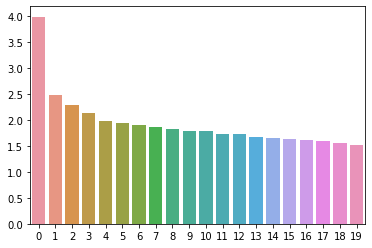

In [77]:
import seaborn as sns
sns.barplot(x=list(range(len(D))), y = D)

In [78]:

term_topic_matrix=pd.DataFrame(data=V_T, index = vectorizer.get_feature_names(), columns = [f'Topic_{r}' for r in range(0,V_T.shape[1])])
lsa_topic = term_topic_matrix
term_topic_matrix

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
aa,0.001414,0.000595,-0.000653,-0.003104,-0.003481,0.002881,0.003211,-2.669334e-03,-0.000932,0.000199,0.000045,-4.210031e-04,-0.000683,-0.001036,1.920268e-03,-0.002807,0.002211,0.002877,0.002635,-0.003497
aaa,0.004764,0.000193,-0.000710,-0.008906,-0.006431,0.006349,0.007243,-2.802289e-03,-0.001447,0.001876,0.003419,-1.006672e-04,-0.001471,0.000901,3.389372e-03,0.001512,-0.000995,0.004640,0.003578,-0.008481
aacc,0.000264,0.000625,-0.000183,0.000366,-0.000159,-0.000419,0.000004,9.654421e-07,0.000020,0.000083,0.000038,6.409134e-05,0.000049,0.000090,3.654713e-07,0.000522,0.000214,0.000195,0.000763,-0.000972
aamir,0.002531,-0.002301,0.001330,-0.005377,-0.005431,0.001582,0.000008,6.935578e-03,-0.004141,0.002802,0.007014,1.598480e-03,-0.006121,-0.003288,5.707793e-03,0.016995,0.011700,-0.001264,-0.004978,0.009366
aarghhhh,0.000692,-0.000297,0.000072,-0.001031,-0.000621,-0.000030,-0.000307,9.564576e-04,-0.000291,0.000319,0.001764,-3.450615e-04,-0.000648,0.000123,-5.802692e-04,-0.000323,-0.002156,0.000574,-0.001657,0.000133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwrf,0.000038,-0.000049,0.000005,-0.000018,-0.000040,-0.000051,-0.000021,-5.205591e-05,0.000009,-0.000038,0.000049,9.015467e-07,-0.000046,-0.000073,-1.020597e-04,0.000107,0.000021,0.000076,0.000074,-0.000028
zx,0.000038,-0.000049,0.000005,-0.000018,-0.000040,-0.000051,-0.000021,-5.205591e-05,0.000009,-0.000038,0.000049,9.015467e-07,-0.000046,-0.000073,-1.020597e-04,0.000107,0.000021,0.000076,0.000074,-0.000028
zxw,0.000038,-0.000049,0.000005,-0.000018,-0.000040,-0.000051,-0.000021,-5.205591e-05,0.000009,-0.000038,0.000049,9.015467e-07,-0.000046,-0.000073,-1.020597e-04,0.000107,0.000021,0.000076,0.000074,-0.000028
zy,0.000076,-0.000098,0.000010,-0.000036,-0.000079,-0.000103,-0.000043,-1.041118e-04,0.000019,-0.000076,0.000099,1.803093e-06,-0.000092,-0.000146,-2.041194e-04,0.000213,0.000041,0.000151,0.000149,-0.000056


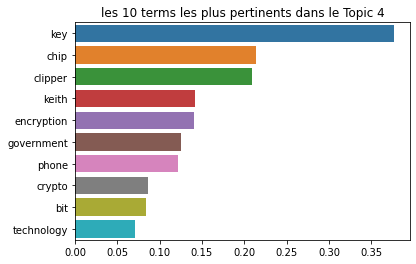

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_4']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 4'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)


## 2.2 LDA
### 2.2.1 Vectorisation

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

#Bag of words 
vectorizer = CountVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized) 


### 2.2.2 Modèle  LDA

In [81]:
alpha=1/20 # valeur par defaut 
eta=1/20 # valeur par defaut 
lda = LatentDirichletAllocation(n_components=20,doc_topic_prior=alpha,topic_word_prior=eta)
theta=lda.fit_transform(vect) #  distribution topics/document
beta=lda.components_  #  distribution mots/topics

### 2.2.3 Evaluation  

In [82]:
# Log Likelyhood: Higher the better
print("Likelihood: ", lda.score(vect))
# Perplexity: Lower the better.
print("Perplexité: ", lda.perplexity(vect))
# visualisation des parametres du modèle 
print(lda.get_params())

Likelihood:  -1084505.7003252243
Perplexité:  6519.5491013910705
{'batch_size': 128, 'doc_topic_prior': 0.05, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': 0.05, 'total_samples': 1000000.0, 'verbose': 0}


### 2.2.2 Visualisation  

In [83]:
#Visualisation de la matrice theta des documents X topics

doc_topic_matrix=pd.DataFrame(data=theta, index = [f'Doc_{r}' for r in range(0,theta.shape[0])], columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
doc_topic_matrix


,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19
Doc_0,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.001020,0.070003,0.001020,0.001020,0.911630
Doc_1,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685,0.986986,0.000685,0.000685,0.000685,0.000685,0.000685,0.000685
Doc_2,0.000345,0.000345,0.000345,0.368375,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.625418
Doc_3,0.000877,0.000877,0.000877,0.000877,0.000877,0.000877,0.000877,0.000877,0.000877,0.000877,0.523893,0.000877,0.000877,0.000877,0.460317,0.000877,0.000877,0.000877,0.000877,0.000877
Doc_4,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.988554,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602,0.000602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc_995,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.366439,0.001852,0.134036,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.001852,0.229230,0.001852,0.001852,0.240666
Doc_996,0.000450,0.000450,0.000450,0.000450,0.000450,0.702977,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.000450,0.020806,0.000450,0.000450,0.000450,0.268560
Doc_997,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641,0.987821,0.000641,0.000641,0.000641,0.000641,0.000641,0.000641
Doc_998,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.000847,0.983898,0.000847,0.000847,0.000847


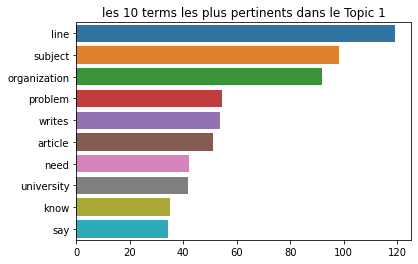

In [84]:
#affichage de la matrice beta des termes x Topics

term_topic_matrix=pd.DataFrame(data=beta.T, index = vectorizer.get_feature_names(), columns = [f'Topic_{r}' for r in range(0,beta.T.shape[1])])
lda_topic = term_topic_matrix


from matplotlib import pyplot as plt
import seaborn as sns

data = term_topic_matrix[f'Topic_0']
data = data.sort_values(ascending=False)
top_10 = data[:10]
title='les 10 terms les plus pertinents dans le Topic 1'
plt.title(title)
sns.barplot(x= top_10.values, y=top_10.index)




 # Exercice
    *Realiser un visualisation globale des differentes topics decouverts pour la LSA et la LDA
    *Appliquer le modele unigrame language model pour decouvrir un topic par document

## visualisation globale

### LSA

In [93]:
# show top 10 terme in each topic
for i in range(20):
  topic = 'Topic_'+str(i)
  data = lsa_topic[topic]
  data = data.sort_values(ascending=False)
  top_10 = data[:10]
  termes = ""
  for terme in top_10.index:
    termes = termes+terme+', '
  print(topic,' : {',termes,'}')

Topic_0  : { line, writes, subject, people, organization, article, know, university, god, like,  }
Topic_1  : { god, armenian, people, jesus, christian, turkish, truth, belief, moral, bible,  }
Topic_2  : { armenian, turkish, genocide, argic, armenia, serdar, turk, muslim, government, russian,  }
Topic_3  : { window, god, armenian, file, jesus, manager, christian, truth, font, program,  }
Topic_4  : { key, chip, clipper, keith, encryption, government, phone, crypto, bit, technology,  }
Topic_5  : { keith, window, morality, moral, livesey, schneider, chimp, allan, pasadena, murder,  }
Topic_6  : { window, key, manager, team, game, clipper, year, ethan, run, player,  }
Topic_7  : { car, geb, gordon, bank, window, israel, jake, engine, speed, water,  }
Topic_8  : { geb, gordon, bank, file, science, pittsburgh, computer, chastity, shameful, skepticism,  }
Topic_9  : { geb, gordon, key, bank, car, armenian, window, pittsburgh, keith, science,  }
Topic_10  : { file, car, image, program, tmc,

### LDA

In [94]:
# show top 10 terme in each topic
for i in range(20):
  topic = 'Topic_'+str(i)
  data = lda_topic[topic]
  data = data.sort_values(ascending=False)
  top_10 = data[:10]
  termes = ""
  for terme in top_10.index:
    termes = termes+terme+', '
  print(topic,' : {',termes,'}')

Topic_0  : { line, subject, organization, problem, writes, article, need, university, know, say,  }
Topic_1  : { line, subject, organization, university, writes, know, article, absolute, think, year,  }
Topic_2  : { line, subject, writes, article, organization, weapon, make, game, god, university,  }
Topic_3  : { line, moral, subject, people, writes, father, keith, say, organization, son,  }
Topic_4  : { good, subject, line, organization, people, excellent, missing, software, armenian, say,  }
Topic_5  : { argument, fallacy, example, conclusion, true, premise, subject, line, writes, organization,  }
Topic_6  : { line, subject, organization, article, writes, window, like, people, university, men,  }
Topic_7  : { jesus, god, people, matthew, christian, say, said, prophecy, bible, know,  }
Topic_8  : { line, organization, subject, value, university, reserve, science, option, file, port,  }
Topic_9  : { line, subject, organization, writes, article, time, use, revolver, right, ca,  }
Topic_

## unigrame language model

In [98]:
# sub the suject of docs
# to reduce compute time we choose just 100 doc
data_unigram = data[:100].copy()

# lemmatized corpus
lemmmatizer=WordNetLemmatizer()
corpus_lemetized=[]
for doc in data_unigram:
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    doc=" ".join(words)
    corpus_lemetized.append(doc)

# vectorization
vectorizer = TfidfVectorizer(stop_words = 'english')
vect = vectorizer.fit_transform(corpus_lemetized)
vect = vect.toarray()


In [118]:

# for each document we choose the terme with the highest frequency [ P(w/T) = count(w,d)/sum(count(wi,d))] as topic
vocab = vectorizer.get_feature_names()
doc_topic_dict = {}
for doc in range(vect.shape[0]):
  topic = 0
  max_proba = 0 
  for word in range(vect[doc,:].shape[0]):
    proba = vect[doc,word]/sum(vect[doc,:])
    if proba>max_proba:
      max_proba = proba
      topic = word
  doc_topic_dict['document_'+str(doc)] = vocab[topic]
print(doc_topic_dict)

{'document_0': 'car', 'document_1': 'clock', 'document_2': 'powerbook', 'document_3': 'weitek', 'document_4': 'error', 'document_5': 'weapon', 'document_6': 'bmdelane', 'document_7': 'scsi', 'document_8': 'icon', 'document_9': 'board', 'document_10': 'irwin', 'document_11': 'moral', 'document_12': 'cerkoney', 'document_13': 'option', 'document_14': 'purchased', 'document_15': 'mathew', 'document_16': 'tiff', 'document_17': 'insurance', 'document_18': 'circuit', 'document_19': 'ncd', 'document_20': 'keith', 'document_21': 'captain', 'document_22': 'catalog', 'document_23': 'font', 'document_24': 'loop', 'document_25': 'hinckley', 'document_26': 'plant', 'document_27': 'doug', 'document_28': 'god', 'document_29': 'frost', 'document_30': 'cover', 'document_31': 'acne', 'document_32': 'exploding', 'document_33': 'arab', 'document_34': 'kaldis', 'document_35': 'mask', 'document_36': 'moa', 'document_37': 'encryption', 'document_38': 'insurance', 'document_39': 'revolver', 'document_40': 'bo